# 한국어 텍스트 데이터 분류

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('customer_data(filtered).csv', encoding='cp949')
df.head()

,Score,Review,SNS,Addr
0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도
1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시
2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시
3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시
4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도


In [18]:
from konlpy.tag import Twitter

twitter = Twitter()

* 한국어 형태소 분석기를 사용한 특징값(tokenize) 추출
* 텍스트 데이터 : 고객이 기업의 제품 체험단에 참여하기 위해 입력한 글
* 형태소 분석기 : KoNLPy을 사용하여 명사와 형용사 추출
* tf-idf값 이용 : 고객 의지가 표현된 특징값 추출

In [20]:
def tokenize(text):
    '''
    for문을 사용해 토큰의 품사가 명사, 형용사일 경우 리스트 변수 stems에 저장
    '''
    stems = []
    tagged = twitter.pos(text) # pos() : 주어진 텍스트를 토큰화하여 품사를 판별하고, pos 태깅을 붙여줌
    for i in range(0, len(tagged)):
        if (tagged[i][1]=='Noun' or tagged[i][1] == 'Adjective'): 
            stems.append(tagged[i][0]) # [i][1]은 품사 [i][0]은 토큰
    return stems

In [26]:
df.head()

# Twitter를 사용한 명사 추출
tagged = twitter.pos(df['Review'][0])
for i in range(0, len(tagged)): # 모든 토큰에 대해 작업 실시
    if tagged[i][1] == 'Noun' : # 명사면 출력함
        print(tagged[i])
        
# 모든 토큰의 품사를 확인할 수 있다.

('데', 'Noun')
('일리', 'Noun')
('적', 'Noun')
('부터', 'Noun')
('고기', 'Noun')
('인스턴트', 'Noun')
('음식', 'Noun')
('장', 'Noun')
('상태', 'Noun')
('더욱', 'Noun')
('업무', 'Noun')
('스트레스', 'Noun')
('또한', 'Noun')
('것', 'Noun')
('체험', 'Noun')
('보고', 'Noun')
('장', 'Noun')
('경험', 'Noun')
('보고', 'Noun')


![스크린샷, 2017-11-23 14-52-45](https://i.imgur.com/9Ir49Tg.png)

In [23]:
# 1. 한국어 형태소 분석기를 사용해 추출한 토큰을 바탕으로 문서 단어 행렬 구성

from sklearn.feature_extraction.text import TfidfVectorizer
    # TF-IDF : Term Frequency Inverse Document Frequency (토큰들이 어느 정도의 빈도로 존재하는가?)
    # 텍스트에서 TF-IDF값을 구하기 위한 패키지

text_data_list = df['Review'].astype(str).tolist()
    # 데이터 프레임의 텍스트를 astype 함수를 사용해 문자열 형태로 변환
    # tolist() 함수를 이용해 리스트로 변환
text_data_arr = np.array([''.join(text) for text in text_data_list])
    # array 함수를 이용해 배열로 순차적으로 변환


In [28]:
vectorizer = TfidfVectorizer(min_df=2, tokenizer=tokenize, norm='l2')
    # TF-IDF 값으로 문서단어행렬을 생성하는 TfidVectorizer를 사용해 모듈 vectorizer를 생성
    # min_df : 단어의 최소 등장 빈도를 2 이상 등장하는 단어들을 대상으로 함
    # tokenize함수를 사용해 명사와 형용사를 추출해 사용
    # norm ='l2' : pearson 함수를 사용해 normalization 진행
    # 행렬에 대해 normalize를 진행하기 위해, l2, pearson 함수를 사용한 표준화를 설정한다.

text_data = vectorizer.fit_transform(text_data_arr)
    # fit_transform 함수 : 문서단어행렬을 만들어서 행렬(matrix) 형식의 변수 'text_data' 변수에 저장

text_data
    # 이렇게 해서 만든 matrix는 2871x2639 = 58,221개의 element가 들어있다.
    # 대부분의 값이 0이고, 일부만 0이 아닌 값이 들어가있다. 
    # 실질적으로는 58,000개가 채워져있음

<2871x2639 sparse matrix of type '<class 'numpy.float64'>'
	with 58221 stored elements in Compressed Sparse Row format>

In [6]:
# TF-IDF 값으로 문서단어 행렬을 데이터 프레임 df_tfidf에 입력해 출력
df_tfidf = pd.DataFrame(text_data.A, columns=vectorizer.get_feature_names())
df_tfidf.head()
    # 행은 문서 번호
    # 열은 토큰(token)을 의미한다.
    # 데이터 크기가 크기 때문에 대부분이 0임.

,가게,가격,가구,가기,가까이,가끔,가능,가능성,가능하다,가능한,...,희망이,힘,힘드네,힘든,힘들,힘들어,힘들었,힘듭니,힘찬,힝
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SNS 출처 데이터 확인하기

In [7]:
# 1. 지역 분포 시각화를 위한 패키지 임포트
%matplotlib inline
import matplotlib.pyplot as plt # matplotlib : 그래프를 그리기 위한 시각화도구
import seaborn as sns # matplotlib을 기반으로 더 세련된 시각화를 위한 라이브러리

# 2. 한글 폰트 사용을 위한 폰트 설정
from matplotlib import font_manager, rc # font_manager, rc : 폰트를 관리함
font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()
rc('font', family=font_name)

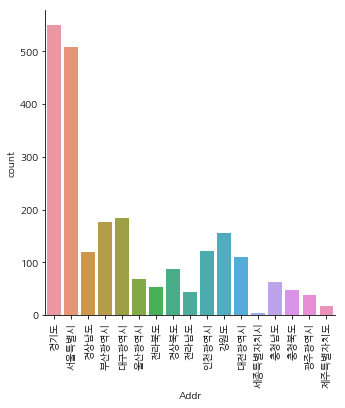

In [8]:
# Seaborn의 factorplot 함수를 사용해 막대 그래프를 그림
g = sns.factorplot('Addr', data=df, kind='count', size=5)
    # factorplot() : 히스토그램 함수를 사용하거나, 라벨을 붙이거나, 한번에 처리가 가능한 함수
    # 주소정보를 시각화하므로 Addr 열을 사용
    # kind='count' : 빈도(frequeny)를 측정하기 위함
    # size : 이미지 크기 5
g.set_xticklabels(rotation=90)
    # 주소가 길기 때문에 90도 회전시켜서 세로로 보이게 조정함.
g.set_xlabels()

# SNS 데이터 분포 시각화

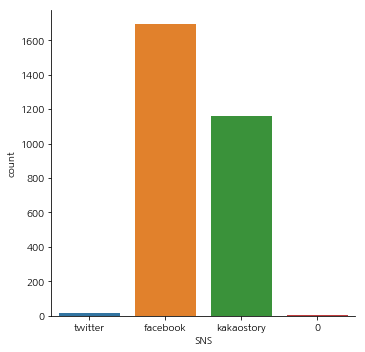

In [9]:
#1. SNS 분포 시각화
g = sns.factorplot('SNS', data=df, kind='count', size=5)
g.set_xlabels()

 # 점수 데이터 시각화

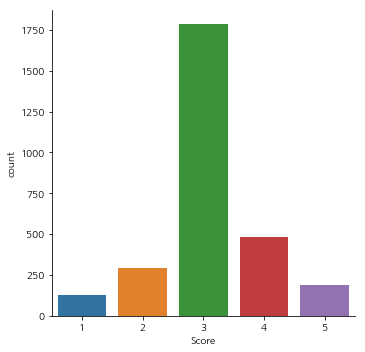

In [10]:
#1. 데이터 프레임의 'Score'값을 시각화
g = sns.factorplot('Score', data=df, kind='count', size=5)
g.set_xlabels()

In [11]:
# 2. 데이터의 통합
df = df.dropna(subset=['Score']) 
    # 점수가 없을 경우 dropna 함수를 사용해 제외(빈 값을 집어넣음)
df.index = range(0, len(df))
    # 인덱스를 재부여함
df['Score2'] = ''
    # 통합된 점수를 입력할 score2 칼럼을 생성

In [12]:
for i in range(0, len(df)):
    '''
    1, 2 : BAD
    3 : NORMAL
    4, 5 : GOOD
    '''
    if(df['Score'][i] < 3) :
        df['Score2'][i] = 'bad'
    elif (df['Score'][i] > 3) :
        df['Score2'][i] = 'good'
    elif (df['Score'][i] == 3) :
        df['Score2'][i] = 'normal'

df.head()


/home/chulgyoo/.pyenv/versions/3.6.1/envs/kmooc/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/chulgyoo/.pyenv/versions/3.6.1/envs/kmooc/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/chulgyoo/.pyenv/versions/3.6.1/envs/kmooc/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

,Score,Review,SNS,Addr,Score2
0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


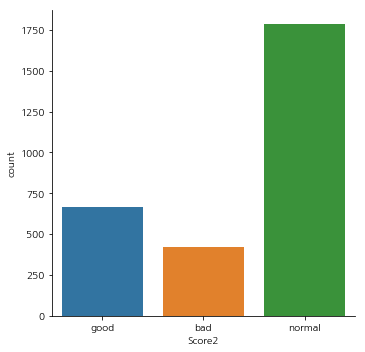

In [29]:
# 5. 통합 후 점수 데이터 시각화
g = sns.factorplot('Score2', data=df, kind='count', size=5)
g.set_xlabels()
    # normal의 빈도가 높지만 good과 bad와의 차이가 감소

# 2. 데이터 분류

In [14]:
df.to_csv('customer_data(filtered)_generated.csv')

In [16]:
df = pd.read_csv('customer_data(filtered)_generated.csv')
df.head()

,Unnamed: 0,Score,Review,SNS,Addr,Score2
0,0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


In [30]:
review_data = df['Review'].astype(str).tolist()
review_label = df['Score2'].astype(str).tolist()
    # 데이터 형식을 str로 바꾼 다음 list로 다시 변경

In [31]:
# 3. 데이서 셋 분할 (80% : training set, 20% : test set)
trainset_size = int(round(len(review_data)*0.80))

    # 기계학습 알고리즘에 적용하기 위해서 np.array()를 사용해 데이터 형식을 변형
x_train = np.array([''.join(data) for data in review_data[0:trainset_size]])
y_train = np.array([data for data in review_label[0:trainset_size]])

x_test = np.array([''.join(data) for data in review_data[trainset_size+1:len(review_data)]])
y_test = np.array([data for data in review_label[trainset_size+1:len(review_label)]])

In [32]:
# 4. 문서 단어 행렬 생성
X_train = vectorizer.fit_transform(x_train)
    # fit_transform : training set을 기반으로 문서단어행렬 구성
X_test = vectorizer.transform(x_test)
    # TF-IDF 형태로 Vectorize한다.
    # transform : test_set을 기반으로 문서단어행렬 구성

# 성능평가

In [33]:
# 1. 성능 평가 결과 입력을 위한 데이터 프레임 생성
df_per = pd.DataFrame(columns=['Classifier', 'F-Measure', 'Accuracy'])
df_per

,Classifier,F-Measure,Accuracy


In [34]:
# 2. 성능 평가 패키지 import
from sklearn.metrics import confusion_matrix # 분류 결과 건수를 나타내는 confusion matrix를 구성하는 모듈
from sklearn.metrics import classification_report # recall, precision, f-measure를 제공하는 모듈
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [35]:
# 나이브 베이즈 알고리즘
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB().fit(X_train, y_train) # train data를 학습
nb_pred = nb_classifier.predict(X_test) # predict 함수를 사용하여 예측값 추출 진행

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pred))
    # 3x3 행렬이 출력되는데, x축은 예측 점수, y축은 실제 점수가 된다.
    # 점수의 순서는 알파벳 순서로 출력되며, bad, good, normal 순이다.
    # 대각선 순서로 0개, 9개, 410개가 제대로 분류되었다.
    # 즉, good 데이터가 101건 중 9건, 92건이 normal로 분류된다.
print('\n Classification Report \n')
print(classification_report(y_test, nb_pred))
    # 세 개의 클래스 별로 precision, recall, f measure를 확인 가능하다.
print('\n Accuracy \n')
print(round(accuracy_score(y_test, nb_pred, normalize=True),2))
    # normalize=True로 설정해 정확도를 계산해 출력한다.
    # False로 지정하면 올바르게 분류된 데이터의 건수를 출력한다.
    



 Confusion Matrix 

[[  0   0  60]
 [  0   9  92]
 [  0   2 410]]

 Classification Report 

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        60
       good       0.82      0.09      0.16       101
     normal       0.73      1.00      0.84       412

avg / total       0.67      0.73      0.63       573


 Accuracy 

0.73


/home/chulgyoo/.pyenv/versions/3.6.1/envs/kmooc/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
# 다른 모델과 성능을 비교하기 위해 데이터 프레임에 저장
fm = round(f1_score(y_test, nb_pred, average='weighted'), 2)
    # average='weighted' : 클래스별 가중치를 적용
    # round 함수를 이용해 소수점 2번째 자리까지 표시
ac = round(accuracy_score(y_test, nb_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Naive Bayes', fm, ac]
df_per

/home/chulgyoo/.pyenv/versions/3.6.1/envs/kmooc/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73


# Decision Tree

In [37]:
# Decision Tree 알고리즘 사용
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test) # 독립변수(X_test)를 집어넣음

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, dt_pred))
print('\n Classification Report \n')
print(classification_report(y_test, dt_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, dt_pred, normalize=True),2))



 Confusion Matrix 

[[ 46   2  12]
 [  1  67  33]
 [ 39  47 326]]

 Classification Report 

             precision    recall  f1-score   support

        bad       0.53      0.77      0.63        60
       good       0.58      0.66      0.62       101
     normal       0.88      0.79      0.83       412

avg / total       0.79      0.77      0.77       573


 Accuracy 

0.77


In [39]:
fm = round(f1_score(y_test, dt_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, dt_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Decison Tree', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.77,0.77
2,Decison Tree,0.77,0.77


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, rf_pred))
print('\n Classification Report \n')
print(classification_report(y_test, rf_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, rf_pred, normalize=True),2))


 Confusion Matrix 

[[ 49   0  11]
 [  0  60  41]
 [ 24   3 385]]

 Classification Report 

             precision    recall  f1-score   support

        bad       0.67      0.82      0.74        60
       good       0.95      0.59      0.73       101
     normal       0.88      0.93      0.91       412

avg / total       0.87      0.86      0.86       573


 Accuracy 

0.86


In [42]:
fm = round(f1_score(y_test, rf_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, rf_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Random Forest', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.77,0.77
2,Decison Tree,0.77,0.77
3,Random Forest,0.86,0.86


# SVM(Support Vector Machine)

In [43]:
# SVM 사용
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC().fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, svm_pred))
print('\n Classification Report \n')
print(classification_report(y_test, svm_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, svm_pred, normalize=True),2))


 Confusion Matrix 

[[ 38   2  20]
 [  0  57  44]
 [ 37  54 321]]

 Classification Report 

             precision    recall  f1-score   support

        bad       0.51      0.63      0.56        60
       good       0.50      0.56      0.53       101
     normal       0.83      0.78      0.81       412

avg / total       0.74      0.73      0.73       573


 Accuracy 

0.73


In [44]:
fm = round(f1_score(y_test, svm_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, svm_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Support Vector Machine', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.77,0.77
2,Decison Tree,0.77,0.77
3,Random Forest,0.86,0.86
4,Support Vector Machine,0.73,0.73


In [45]:
df_per_1 = df_per.set_index('Classifier')
df_per_1

,F-Measure,Accuracy
Classifier,,
Naive Bayes,0.63,0.73
Decison Tree,0.77,0.77
Decison Tree,0.77,0.77
Random Forest,0.86,0.86
Support Vector Machine,0.73,0.73


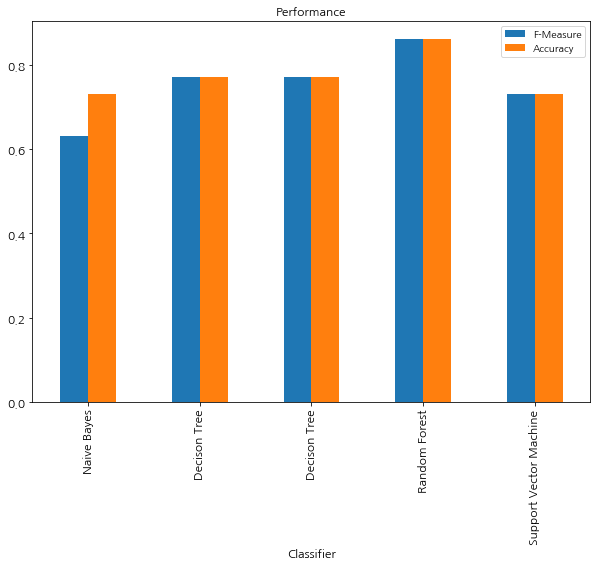

In [46]:
# plot 함수를 이용해 성능 시각화
ax = df_per_1[['F-Measure','Accuracy']].plot(kind='bar', title ='Performance'
                                             , figsize=(10, 7), legend=True, fontsize=12)
    # kind = 'bar' : 막대 그래프
    # title = 'performance' : 그래프 제목
    # figsize : 그래프 크기 지정
    # legend : 데이터 설명
    # fontsize : 글씨 크기
ax.set_xlabel('Classifier', fontsize=12)
    # x축을 분류기 명으로 지정
plt.show()